In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, UpSampling2D, Reshape
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
def load_data(image_folder, mask_folder):
    images = []
    masks = []
    for filename in os.listdir(image_folder):
        img = cv2.imread(os.path.join(image_folder, filename))
        img = cv2.resize(img, (32, 32))  # Resize for LeNet-5 input size
        images.append(img)
        mask = cv2.imread(os.path.join(mask_folder, filename), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (32, 32))  # Resize to match model output size
        mask = np.expand_dims((mask > 127).astype(np.uint8), axis=-1)  # Convert to binary mask and add channel dimension
        masks.append(mask)
    return np.array(images), np.array(masks)

In [ ]:
train_images, train_masks = load_data("/content/drive/MyDrive/ENG21CS0346&ENG21CS0323_DL_PROJECT/training_images", "/content/drive/MyDrive/ENG21CS0346&ENG21CS0323_DL_PROJECT/training_masks")
test_images, test_masks = load_data("/content/drive/MyDrive/ENG21CS0346&ENG21CS0323_DL_PROJECT/test_images", "/content/drive/MyDrive/ENG21CS0346&ENG21CS0323_DL_PROJECT/test_masks")

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def create_model(input_shape):
    inputs = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(6, (5, 5), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(16, (5, 5), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(120, activation='relu')(x)
    x = Dense(84, activation='relu')(x)
    x = Dense(32 * 32, activation='sigmoid')(x)  # Adjusted output layer to match mask size
    outputs = Reshape((32, 32, 1))(x)  # Reshape to match the shape of the masks

    return Model(inputs=inputs, outputs=outputs)

In [ ]:
model = create_model(input_shape=(32, 32, 3))

In [ ]:
model.compile(optimizer=Adam(), loss=binary_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_masks, epochs=10, batch_size=8, validation_split=0.2)

Epoch 1/10
199/199 [==============================] - 4s 13ms/step - loss: 0.5720 - accuracy: 0.7027 - val_loss: 0.5373 - val_accuracy: 0.7410
Epoch 2/10
199/199 [==============================] - 2s 12ms/step - loss: 0.5181 - accuracy: 0.7546 - val_loss: 0.5002 - val_accuracy: 0.7715
Epoch 3/10
199/199 [==============================] - 3s 16ms/step - loss: 0.4923 - accuracy: 0.7728 - val_loss: 0.4685 - val_accuracy: 0.7887
Epoch 4/10
199/199 [==============================] - 3s 17ms/step - loss: 0.4789 - accuracy: 0.7826 - val_loss: 0.4563 - val_accuracy: 0.7949
Epoch 5/10
199/199 [==============================] - 2s 11ms/step - loss: 0.4606 - accuracy: 0.7928 - val_loss: 0.4436 - val_accuracy: 0.8045
Epoch 6/10
199/199 [==============================] - 2s 11ms/step - loss: 0.4454 - accuracy: 0.7999 - val_loss: 0.4678 - val_accuracy: 0.7956
Epoch 7/10
199/199 [==============================] - 2s 11ms/step - loss: 0.4329 - accuracy: 0.8078 - val_loss: 0.4217 - val_accuracy: 0.8164

In [ ]:
loss, accuracy = model.evaluate(test_images, test_masks)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

27/27 [==============================] - 0s 12ms/step - loss: 0.4395 - accuracy: 0.8107
Test Loss: 0.4394623935222626
Test Accuracy: 0.810663640499115


In [ ]:
predicted_masks = model.predict(test_images)

27/27 [==============================] - 0s 11ms/step


In [ ]:
water_probability = np.mean(predicted_masks)
water_percentage = np.sum(predicted_masks) / np.sum(test_masks)

In [ ]:
print("Water Probability:", water_probability)
print("Water Percentage:", water_percentage*100)

Water Probability: 0.32914332
Water Percentage: 102.36363041597384


Image 1 - Water Probability: 0.211954265832901


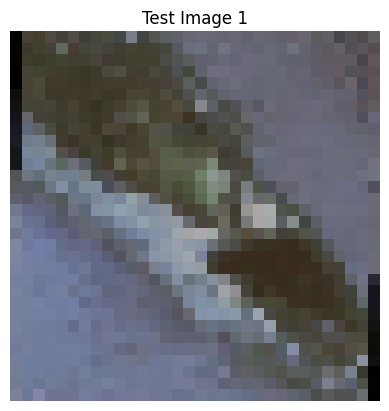

Image 2 - Water Probability: 0.3182142674922943


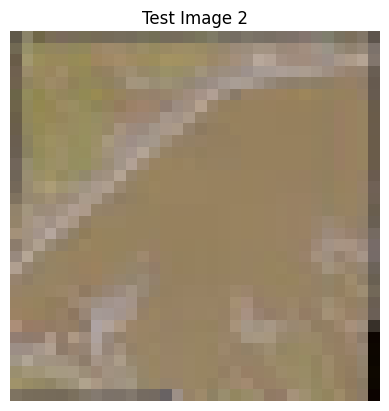

Image 3 - Water Probability: 0.5074732303619385


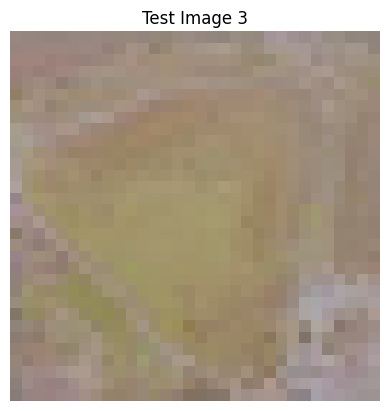

Image 4 - Water Probability: 0.5308796167373657


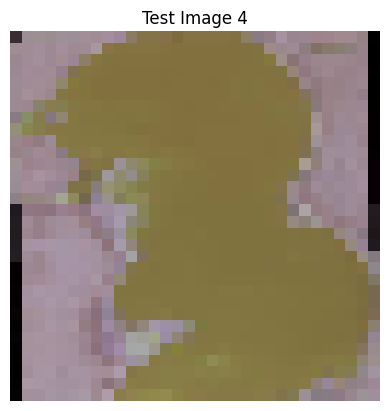

Image 5 - Water Probability: 0.45351362228393555


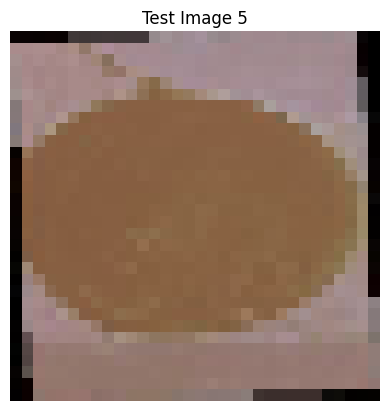

Image 6 - Water Probability: 0.16047143936157227


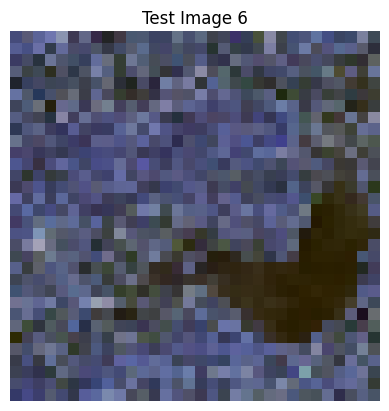

Image 7 - Water Probability: 0.29100966453552246


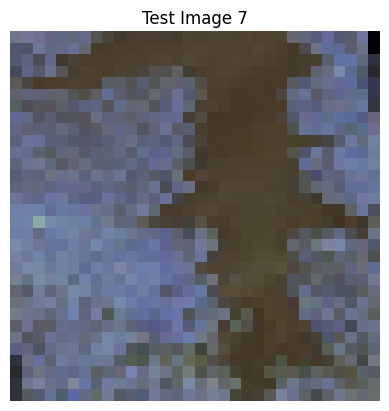

Image 8 - Water Probability: 0.2230474352836609


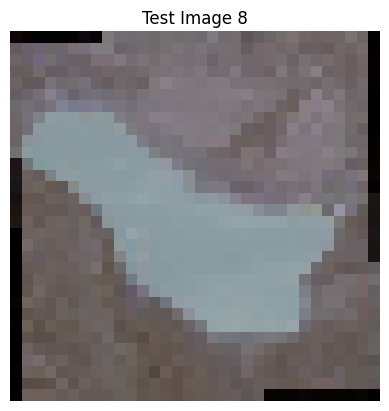

Image 9 - Water Probability: 0.9999969005584717


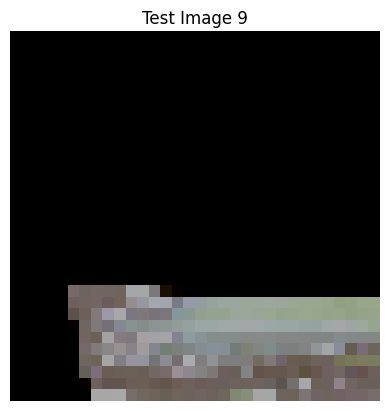

Image 10 - Water Probability: 0.13867595791816711


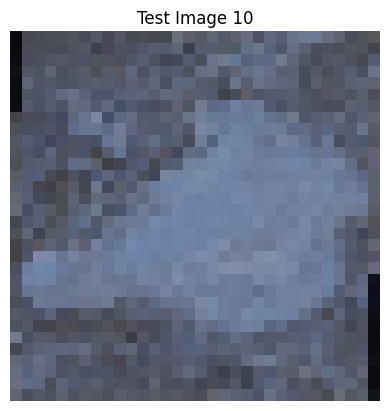

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
    water_probability = np.mean(predicted_masks[i])
    print(f"Image {i+1} - Water Probability: {water_probability}")

    # Display the image
    plt.imshow(test_images[i])
    plt.title(f"Test Image {i+1}")
    plt.axis("off")
    plt.show()